In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# Load the training set and show its first 5 rows
train_filename = "mnist_train.csv"
raw_train_data = pd.read_csv(train_filename)
print("Training set shape:", raw_train_data.shape)
raw_train_data.head()

# Load the test set and show its first 5 rows
test_filename = "mnist_test.csv"
raw_test_data = pd.read_csv(test_filename)
print("Test set shape:", raw_test_data.shape)
raw_test_data.head()


Training set shape: (60000, 785)
Test set shape: (10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_hidden = np.random.randn(input_size, hidden_size)
        self.biases_hidden = np.zeros(hidden_size)
        #Hidden layers
        self.weights_output = np.random.randn(hidden_size, output_size)
        self.biases_output = np.zeros(output_size)
        
        # Initialize hidden_outputs attribute
        self.hidden_outputs = None
        
    def relu(self, x):
        return np.maximum(0, x)
    
    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=-1, keepdims=True)
    
    def forward(self, inputs):
        # Forward pass through hidden layer
        hidden_inputs = np.dot(inputs, self.weights_hidden) + self.biases_hidden
        self.hidden_outputs = self.relu(hidden_inputs)
        
        # Forward pass through output layer
        output_inputs = np.dot(self.hidden_outputs, self.weights_output) + self.biases_output
        predicted_outputs = self.softmax(output_inputs)
        
        return predicted_outputs
    
    def backward(self, inputs, targets, predicted_outputs, learning_rate):
        # Compute gradients
        output_error = predicted_outputs - targets
        output_delta = output_error / len(inputs)
        
        # Update weights and biases for output layer
        self.weights_output -= learning_rate * np.dot(self.hidden_outputs.T, output_delta)
        self.biases_output -= learning_rate * np.sum(output_delta, axis=0)
        
        # Compute gradients for hidden layer
        hidden_error = np.dot(output_delta, self.weights_output.T)
        hidden_delta = hidden_error * (self.hidden_outputs > 0)
        
        # Update weights and biases for hidden layer
        self.weights_hidden -= learning_rate * np.dot(inputs.T, hidden_delta)
        self.biases_hidden -= learning_rate * np.sum(hidden_delta, axis=0)


In [58]:
# training set
X_train = raw_train_data.drop('label', axis=1) / 255.0  # Scale pixel values to range [0, 1]
y_train = pd.get_dummies(raw_train_data['label']).values  # One-hot encode target labels

# test set
X_test = raw_test_data.drop('label', axis=1) / 255.0  # Scale pixel values to range [0, 1]
y_test = pd.get_dummies(raw_test_data['label']).values  # One-hot encode target labels


print("Training Features shape:", X_train.shape)
print("Training Labels shape:", y_train.shape)
print("Test Features shape:", X_test.shape)
print("Test Labels shape:", y_test.shape)


Training Features shape: (60000, 784)
Training Labels shape: (60000, 10)
Test Features shape: (10000, 784)
Test Labels shape: (10000, 10)


In [62]:
#Limits
learning_rate = 0.01
epochs = 10
batch_size = 64

# Initialize
input_size = X_train.shape[1]
hidden_size = 128
output_size = 10
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Training loop
for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        # Mini-batch training data
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        
        # Forward pass
        predicted_outputs = nn.forward(X_batch)
        
        # Backward pass
        nn.backward(X_batch, y_batch, predicted_outputs, learning_rate)
        
    # Forward pass on training set to get loss and accuracy
    predicted_outputs_train = nn.forward(X_train)
    loss = np.mean(-np.sum(y_train * np.log(predicted_outputs_train), axis=1))
    accuracy = np.mean(np.argmax(predicted_outputs_train, axis=1) == np.argmax(y_train, axis=1))
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")



Epoch 1/10, Loss: 5.0666, Accuracy: 0.7998
Epoch 2/10, Loss: 3.4354, Accuracy: 0.8409
Epoch 3/10, Loss: 2.6714, Accuracy: 0.8597
Epoch 4/10, Loss: 2.2054, Accuracy: 0.8712
Epoch 5/10, Loss: 1.8881, Accuracy: 0.8788
Epoch 6/10, Loss: 1.6541, Accuracy: 0.8844
Epoch 7/10, Loss: 1.4712, Accuracy: 0.8888
Epoch 8/10, Loss: 1.3269, Accuracy: 0.8924
Epoch 9/10, Loss: 1.2093, Accuracy: 0.8956
Epoch 10/10, Loss: 1.1112, Accuracy: 0.8983


In [63]:
# Forward pass on test set
predicted_outputs_test = nn.forward(X_test)

# Compute loss and accuracy on test set
test_loss = np.mean(-np.sum(y_test * np.log(predicted_outputs_test), axis=1))
test_accuracy = np.mean(np.argmax(predicted_outputs_test, axis=1) == np.argmax(y_test, axis=1))

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Test Loss: 1.3166, Test Accuracy: 0.8913


In [ ]:
# This is great, if we look at our accuracy with the 10 trained tests we did we can see that the accuracy is almost identical to our test
# data, this means our program is successfully identifying the number properly. Lets look at some visualization of how the tranning loss and accuracy is 
# performing on a graph.

Epoch 1/10, Loss: 0.5804, Accuracy: 0.9149
Epoch 2/10, Loss: 0.5564, Accuracy: 0.9161
Epoch 3/10, Loss: 0.5345, Accuracy: 0.9170
Epoch 4/10, Loss: 0.5144, Accuracy: 0.9179
Epoch 5/10, Loss: 0.4961, Accuracy: 0.9189
Epoch 6/10, Loss: 0.4794, Accuracy: 0.9198
Epoch 7/10, Loss: 0.4641, Accuracy: 0.9206
Epoch 8/10, Loss: 0.4497, Accuracy: 0.9213
Epoch 9/10, Loss: 0.4366, Accuracy: 0.9221
Epoch 10/10, Loss: 0.4242, Accuracy: 0.9226


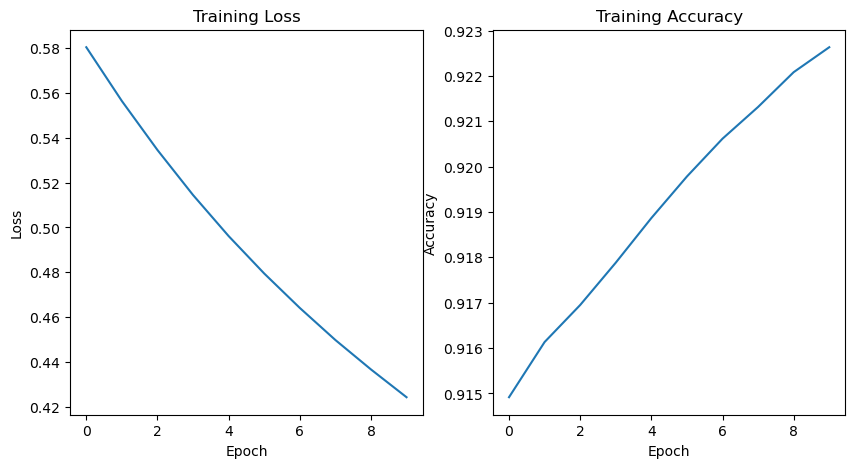

In [67]:
losses = []
accuracies = []

for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        # Mini-batch training data
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        
        # Forward pass
        predicted_outputs = nn.forward(X_batch)
        
        # Backward pass
        nn.backward(X_batch, y_batch, predicted_outputs, learning_rate)
        
    # Forward pass on entire 
    predicted_outputs_train = nn.forward(X_train)
    loss = np.mean(-np.sum(y_train * np.log(predicted_outputs_train), axis=1))
    accuracy = np.mean(np.argmax(predicted_outputs_train, axis=1) == np.argmax(y_train, axis=1))
    
    losses.append(loss)
    accuracies.append(accuracy)
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Plot training loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()


In [ ]:
#Now lets pick some random data and see how our model is performing visually!!

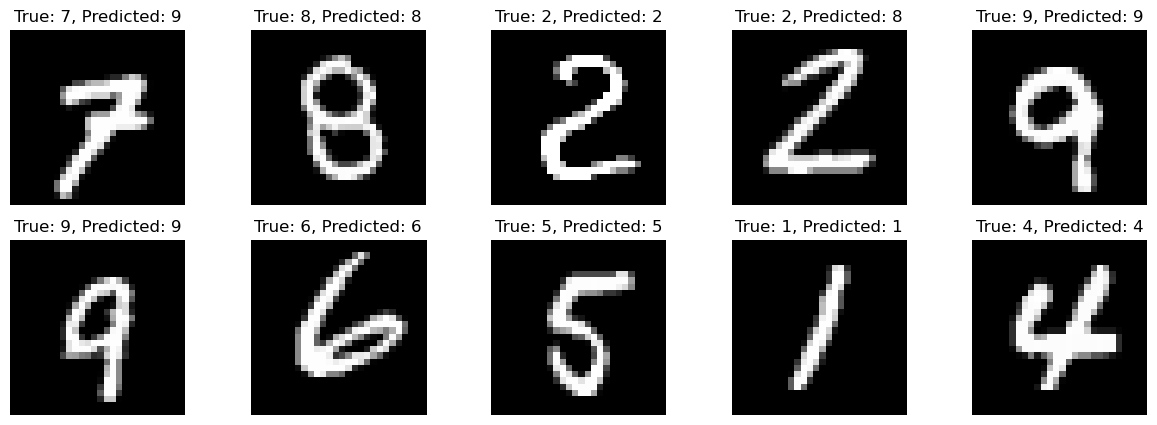

In [70]:
# some random images from the test set
num_samples = 10
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test.values[random_indices]  # Convert DataFrame to numpy array
sample_labels = np.argmax(y_test[random_indices], axis=1)

# Forward pass on sample images
predicted_labels = np.argmax(nn.forward(sample_images), axis=1)

# Plot sample images with their predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {sample_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')

plt.show()


In [71]:
# Look at the accuracy! Although this is a smaller and randomized pick our model worked 80% of the time. We can see one error in the first image where
# the value looks to be 7 but the predicted value is 9 and in the 4th value from the left shows 2 but was predicted 8. After tying this for a couple of
# trails I realized that the model is consistant on 80% and I think it is a great model for its purpose. I think this model can be better by fine tuning
# and adjusting its parameters but overall with the accuracy alligning with the test set, we can confidently say that this is an excellent model!